In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 5

# Read data

In [3]:
%cd '~/Computrain/InCompany/Europese Commisie/Python Data Science/Notebooks'

/Users/peter/Computrain/InCompany/Europese Commisie/Python Data Science/Notebooks


In [4]:
# for windows: r'C:\temp\blah.csv'

In [5]:
%pwd

'/Users/peter/Computrain/InCompany/Europese Commisie/Python Data Science/Notebooks'

In [6]:
df = pd.read_csv('datasets/Nobel_Prize_Laureates.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
id                   991 non-null int64
firstname            985 non-null object
surname              954 non-null object
born                 991 non-null object
died                 991 non-null object
bornCountry          958 non-null object
bornCountryCode      958 non-null object
bornCity             957 non-null object
diedCountry          614 non-null object
diedCountryCode      613 non-null object
diedCity             608 non-null object
gender               991 non-null object
year                 985 non-null float64
category             985 non-null object
overallMotivation    16 non-null object
share                985 non-null float64
motivation           897 non-null object
name                 736 non-null object
city                 726 non-null object
country              726 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 154.9+ KB


In [8]:
df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


In [9]:
years = df['year'].dropna().astype(int)

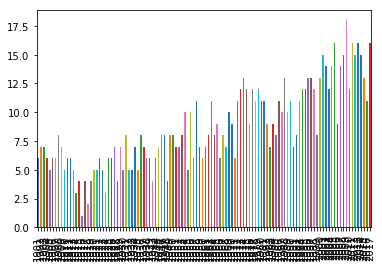

In [10]:
years_count = years.value_counts().sort_index()
years_count.plot(kind='bar')

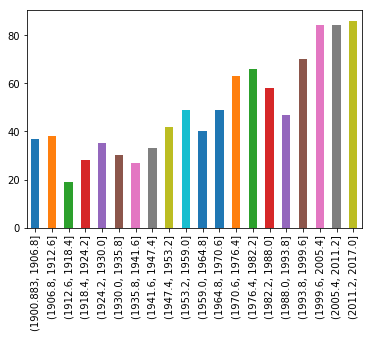

In [11]:
years_count = years.value_counts(bins=20).sort_index()
years_count.plot(kind='bar')

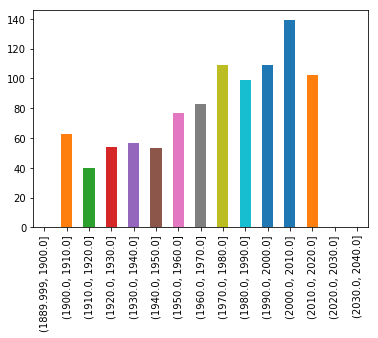

In [12]:
bins = list(range(1890,2050,10))

years_count = years.value_counts(bins=bins).sort_index()

years_count.plot(kind='bar')

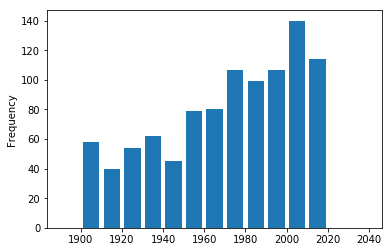

In [13]:
years.plot(kind='hist', bins=bins, rwidth=0.8)

In [14]:
hist = np.histogram(years, bins=bins)
hist

(array([  0,  58,  40,  54,  62,  45,  79,  80, 107,  99, 107, 140, 114,
          0,   0]),
 array([1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,
        2000, 2010, 2020, 2030, 2040]))

In [ ]:
hist.plot(kind='bar')

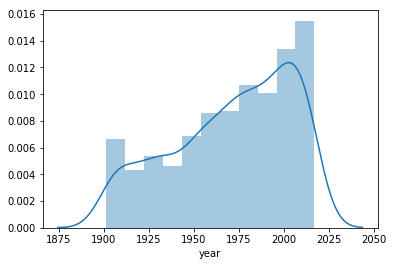

In [16]:
sns.distplot(years)

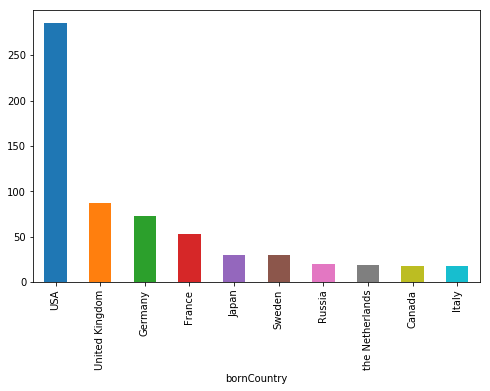

In [112]:
by_country = df.groupby('bornCountry')
count_per_country = by_country['id'].count()
count_per_country.nlargest(10).plot(kind='bar')

In [36]:
df['bornYear'] = df.loc[df['born']!='0000-00-00','born'].str.slice(0,4).astype(int)
df['age'] = df['year'] - df['bornYear']
df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,category,overallMotivation,share,motivation,name,city,country,bornYear,age,bornCountryCode2
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,1845.0,56.0,D
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,1853.0,49.0,N
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,1865.0,37.0,N
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,1852.0,51.0,NaN
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,1859.0,44.0,NaN


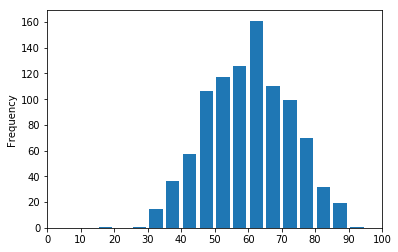

In [17]:
bins = list(range(0,100,5))
ax = df['age'].plot(kind = 'hist', 
                    bins = bins,
                    xlim = (0, 100),
                    xticks = np.linspace(0,100,11),
                    rwidth = 0.8)

### Per category

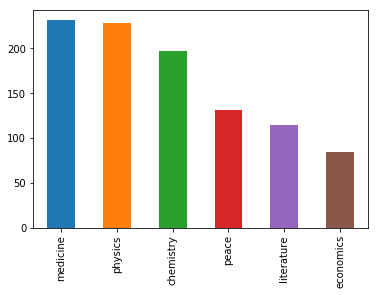

In [18]:
df['category'].value_counts().plot(kind='bar')

In [19]:
df

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,year,category,overallMotivation,share,motivation,name,city,country,bornYear,age
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,1845.0,56.0
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,1853.0,49.0
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,1865.0,37.0
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,1852.0,51.0
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,1859.0,44.0
5,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,...,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",NaN,NaN,NaN,1867.0,36.0
6,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,...,1911.0,chemistry,NaN,1.0,"""in recognition of her services to the advance...",Sorbonne University,Paris,France,1867.0,44.0
7,8,Lord Rayleigh,(John William Strutt),1842-11-12,1919-06-30,United Kingdom,GB,"Langford Grove, Maldon, Essex",United Kingdom,GB,...,1904.0,physics,NaN,1.0,"""for his investigations of the densities of th...",Royal Institution of Great Britain,London,United Kingdom,1842.0,62.0
8,9,Philipp Eduard Anton,von Lenard,1862-06-07,1947-05-20,Hungary (now Slovakia),SK,Pressburg (now Bratislava),Germany,DE,...,1905.0,physics,NaN,1.0,"""for his work on cathode rays""",Kiel University,Kiel,Germany,1862.0,43.0
9,10,Joseph John,Thomson,1856-12-18,1940-08-30,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,...,1906.0,physics,NaN,1.0,"""in recognition of the great merits of his the...",University of Cambridge,Cambridge,United Kingdom,1856.0,50.0


In [58]:
# df.drop(['bornCountryCode2','bornCountryCode3'], axis='columns', inplace=True)

trans = pd.Series({'DE':'D',
                   'NL':'N'})

mask = df['bornCountryCode'].isin(trans.index)

df['bornCountryCode2'] = df.loc[mask,'bornCountryCode'].map(trans)


In [59]:
df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,category,overallMotivation,share,motivation,name,city,country,bornYear,age,bornCountryCode2
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,1845.0,56.0,D
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,1853.0,49.0,N
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,1865.0,37.0,N
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,1852.0,51.0,NaN
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,1859.0,44.0,NaN
